# DA21-C ML Assignment 3

- CRIM - per capita crime rate by town
- ZN - the proportion of residential land zoned for lots over 25,000 sq.ft.
- INDUS - the proportion of non-retail business acres per town.
- CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
- NOX - nitric oxides concentration (parts per 10 million)
- RM - the average number of rooms per dwelling
- AGE - the proportion of owner-occupied units built prior to 1940
- DIS - weighted distances to five Boston employment centers
- RAD - index of accessibility to radial highways
- TAX - full-value property-tax rate per $10,000
- PTRATIO - pupil-teacher ratio by town
- B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- LSTAT - % lower status of the population
- MEDV - Median value of owner-occupied homes in $1000's

In [108]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [109]:
df = pd.read_csv("Boston_Housing.xlsx - Data.csv")
print(df.shape)
df.head().T


(506, 14)


,0,1,2,3,4
CRIM,0.00632,0.02731,0.02729,0.03237,0.06905
ZN,18,0,0,0,0
INDUS,2.31,7.07,7.07,2.18,2.18
CHAS,0.0,0.0,0.0,0.0,0.0
NOX,0.538,0.469,0.469,0.458,0.458
RM,6.575,6.421,7.185,6.998,7.147
AGE,65.2,78.9,61.1,45.8,54.2
DIS,4.09,4.9671,4.9671,6.0622,6.0622
RAD,1.0,2.0,2.0,3.0,3.0
TAX,296,242,242,222,222


In [110]:
for i in df.columns:
    noise=[]
    for j in i:
        try:
            float(j)
            
        except:
            noise.append(j)
    print(set(noise))

{'C', 'M', 'I', 'R'}
{'N', 'Z'}
{'N', 'U', 'I', 'S', 'D'}
{'C', 'S', 'H', 'A'}
{'N', 'X', 'O'}
{'M', 'R'}
{'E', 'G', 'A'}
{'S', 'D', 'I'}
{'D', 'A', 'R'}
{'T', 'X', 'A'}
{'A', 'T', 'O', 'I', 'P', 'R'}
{'B'}
{'T', 'S', 'L', 'A'}
{'E', 'V', 'M', 'D'}


In [111]:
for i in df.columns:
    df[i] = pd.to_numeric(df[i],errors = 'coerce')

In [112]:
df.fillna(method = 'bfill',axis=1,inplace=True)

In [113]:
desc = pd.DataFrame(index = list(df))
desc['count'] = df.shape[0]
desc['unique_cnt'] = df.nunique()
desc['null_cnt'] = df.isnull().sum()
desc['dtypes'] = df.dtypes
desc = pd.concat([desc,df.describe().T],axis=1)
desc

,count,unique_cnt,null_cnt,dtypes,count,mean,std,min,25%,50%,75%,max
CRIM,506,504,0,float64,506.0,3.947219,10.346546,0.000,0.081900,0.253715,3.677083,97.3
ZN,506,29,0,float64,506.0,11.542352,23.699556,0.000,0.000000,0.000000,12.500000,100.0
INDUS,506,80,0,float64,506.0,11.225613,8.750301,0.000,4.950000,8.560000,18.100000,97.3
CHAS,506,9,0,float64,506.0,0.498200,6.018974,0.000,0.000000,0.000000,0.000000,97.3
NOX,506,88,0,float64,506.0,0.984314,5.985108,0.385,0.449000,0.538000,0.629250,97.3
RM,506,447,0,float64,506.0,6.638611,5.645058,3.561,5.887250,6.209000,6.629750,97.3
AGE,506,358,0,float64,506.0,67.672134,28.801504,1.000,42.450000,76.600000,93.900000,100.0
DIS,506,408,0,float64,506.0,5.475739,24.819637,1.000,2.101425,3.272100,5.241300,396.9
RAD,506,11,0,float64,506.0,12.217253,32.831130,1.000,4.000000,5.000000,24.000000,396.9
TAX,506,71,0,float64,506.0,402.576146,168.848849,20.900,277.000000,330.000000,666.000000,711.0


<Axes: >

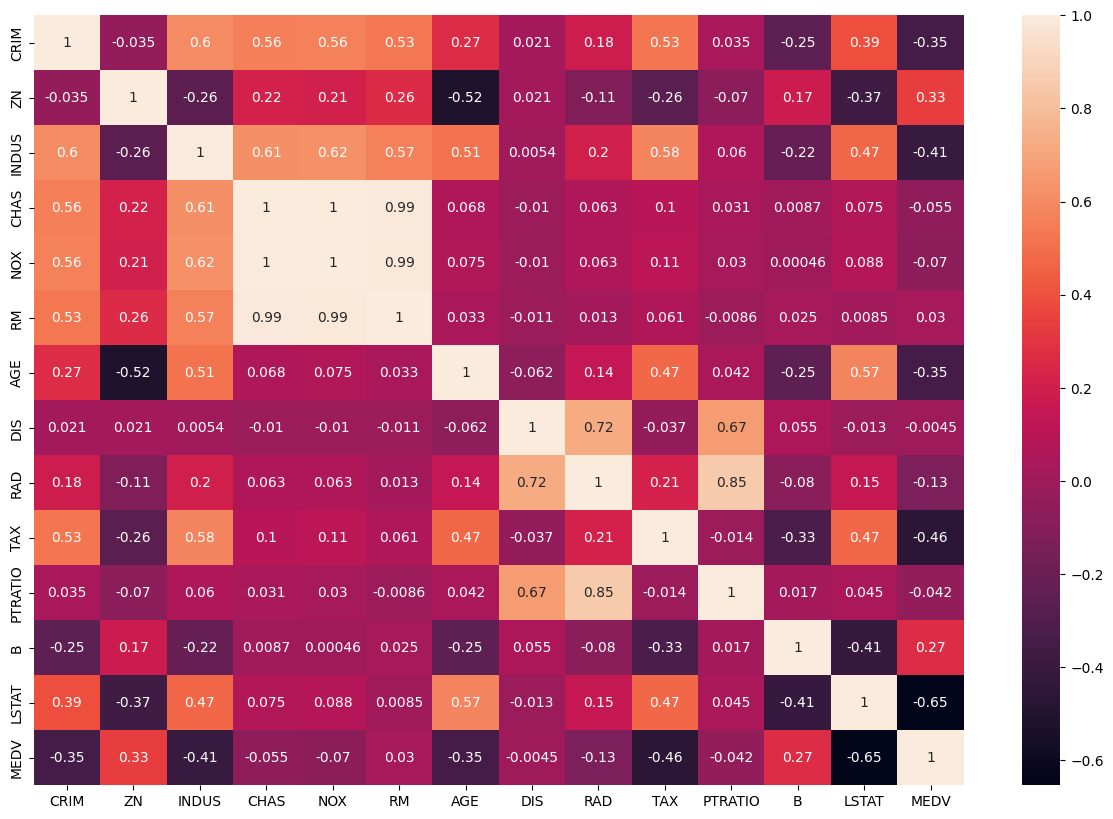

In [114]:
cor_mat = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(cor_mat,annot=True)

<Axes: xlabel='RM', ylabel='MEDV'>

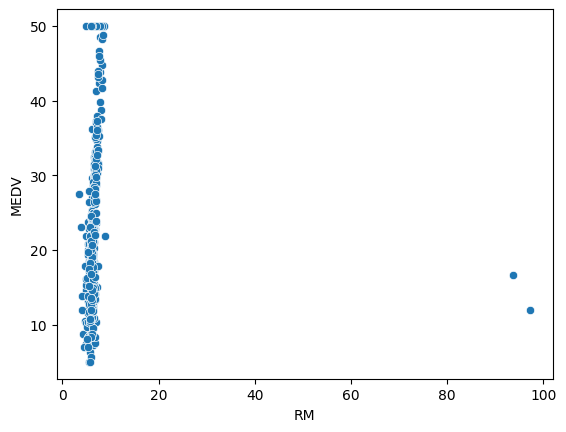

In [115]:
sns.scatterplot(df,x='RM',y='MEDV')

In [116]:
df[df['MEDV']>20].shape[0]

291

In [117]:
df['AGE'].std()

28.801503573748313

In [118]:
scaler = StandardScaler()
to_scale = list(df.columns)
to_scale.remove('MEDV')
df[to_scale] = scaler.fit_transform(df[to_scale])

In [119]:
pca = PCA(n_components=12,random_state=42)
pca.fit(df[to_scale])
print(pca.explained_variance_ratio_)
transformed_data = pca.transform(df[to_scale])

[0.32868762 0.21685969 0.18610055 0.07166516 0.05335666 0.03830692
 0.03204905 0.0263436  0.02393365 0.01377288 0.00804921 0.00074225]


In [120]:
transformed_data.shape


(506, 12)

In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,mean_squared_error

In [122]:
x_train,x_test,y_train,y_test = train_test_split(transformed_data,df['MEDV'],test_size=0.05,random_state=42)

In [123]:
model = LinearRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [124]:
err2  =mean_squared_error(y_test,y_pred)
print(err2)

19.014872662083306


In [125]:
accuracy = model.score(x_test,y_test)
accuracy

0.7293676565268394